In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import calendar
import numpy as np
plt.style.use('seaborn-whitegrid')

# Files to Load 
ca_data_to_load = "Kaggle_Datasets/CAvideos.csv"
us_data_to_load = "Kaggle_Datasets/USvideos.csv"
mx_data_to_load = "Kaggle_Datasets/MXvideos.csv"
jp_data_to_load = "Kaggle_Datasets/JPvideos.csv"
in_data_to_load = "Kaggle_Datasets/INvideos.csv"
kr_data_to_load = "Kaggle_Datasets/KRvideos.csv"


# Read in Data Files and store into Pandas Data Frames
ca_data = pd.read_csv(ca_data_to_load, encoding='ANSI')
us_data = pd.read_csv(us_data_to_load, encoding='ANSI')
mx_data = pd.read_csv(mx_data_to_load, encoding='ANSI')
jp_data = pd.read_csv(jp_data_to_load, encoding='ANSI')
in_data = pd.read_csv(in_data_to_load, encoding='ANSI')
kr_data = pd.read_csv(kr_data_to_load, encoding='ANSI')

In [2]:
reduced_ca_data = ca_data.loc[:, ["video_id", "publish_time", "category_id"]].reindex()
reduced_us_data = us_data.loc[:, ["video_id", "publish_time", "category_id"]].reindex()
reduced_mx_data = mx_data.loc[:, ["video_id", "publish_time", "category_id"]].reindex()
reduced_jp_data = jp_data.loc[:, ["video_id", "publish_time", "category_id"]].reindex()
reduced_in_data = in_data.loc[:, ["video_id", "publish_time", "category_id"]].reindex()
reduced_kr_data = kr_data.loc[:, ["video_id", "publish_time", "category_id"]].reindex()

reduced_ca_data[['Publish Year','Publish Month', 'Date and Time']] = reduced_ca_data.publish_time.str.split("-",expand=True,)
reduced_us_data[['Publish Year','Publish Month', 'Date and Time']] = reduced_us_data.publish_time.str.split("-",expand=True,)
reduced_mx_data[['Publish Year','Publish Month', 'Date and Time']] = reduced_mx_data.publish_time.str.split("-",expand=True,)
reduced_jp_data[['Publish Year','Publish Month', 'Date and Time']] = reduced_jp_data.publish_time.str.split("-",expand=True,)
reduced_in_data[['Publish Year','Publish Month', 'Date and Time']] = reduced_in_data.publish_time.str.split("-",expand=True,)
reduced_kr_data[['Publish Year','Publish Month', 'Date and Time']] = reduced_kr_data.publish_time.str.split("-",expand=True,)

reduced_ca_data[['Publish Date', 'Publish Time']] = reduced_ca_data.publish_time.str.split("T",expand=True,)
reduced_us_data[['Publish Date', 'Publish Time']] = reduced_us_data.publish_time.str.split("T",expand=True,)
reduced_mx_data[['Publish Date', 'Publish Time']] = reduced_mx_data.publish_time.str.split("T",expand=True,)
reduced_jp_data[['Publish Date', 'Publish Time']] = reduced_jp_data.publish_time.str.split("T",expand=True,)
reduced_in_data[['Publish Date', 'Publish Time']] = reduced_in_data.publish_time.str.split("T",expand=True,)
reduced_kr_data[['Publish Date', 'Publish Time']] = reduced_kr_data.publish_time.str.split("T",expand=True,)


In [3]:
#counvert the 'Publish Date' to figure out which day of the week the trending videos are published
reduced_ca_data['Publish Day'] = reduced_ca_data['Publish Date'].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().strftime('%w'))
reduced_us_data['Publish Day'] = reduced_ca_data['Publish Date'].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().strftime('%w'))
reduced_mx_data['Publish Day'] = reduced_ca_data['Publish Date'].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().strftime('%w'))
reduced_jp_data['Publish Day'] = reduced_ca_data['Publish Date'].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().strftime('%w'))
reduced_in_data['Publish Day'] = reduced_ca_data['Publish Date'].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().strftime('%w'))
reduced_kr_data['Publish Day'] = reduced_ca_data['Publish Date'].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().strftime('%w'))

In [4]:
#insert a new column titled "Country" for each of my country's datasets and fill it with the Country name at column 0
reduced_ca_data.insert(0, 'Country', 'Canada')
reduced_us_data.insert(0, 'Country', 'United States')
reduced_mx_data.insert(0, 'Country', 'Mexico')
reduced_jp_data.insert(0, 'Country', 'Japan')
reduced_in_data.insert(0, 'Country', 'India')
reduced_kr_data.insert(0, 'Country', 'South Korea')

In [5]:
#Add all 6 dataframes so that I only have the columns I want and all the country's
#data falls below each other
frames=[reduced_ca_data, reduced_us_data, reduced_mx_data, reduced_in_data, reduced_jp_data, reduced_kr_data]
result=pd.concat(frames, axis=0, join='outer',ignore_index=True)
result['Publish Day'].value_counts()

5    37128
4    31285
1    30703
2    30448
3    28665
6    28215
0    28211
Name: Publish Day, dtype: int64

In [6]:
#split up our data into groups based on category ID and publish day
cat_day = result.groupby(['category_id', 'Publish Day'])

count_it_up = cat_day.Country.count()
count_it_up.head()

category_id = 24 #Entertainment
entertainment = count_it_up.loc[category_id]

category_id = 10 #music
music = count_it_up.loc[category_id]

category_id = 25 #News & Politics
news_politics = count_it_up.loc[category_id]

category_id = 26 #How To & Style
how_style = count_it_up.loc[category_id]

category_id = 2 #People & BLogs
people_blogs = count_it_up.loc[category_id]

category_id = 17 #Sports
sports = count_it_up.loc[category_id]

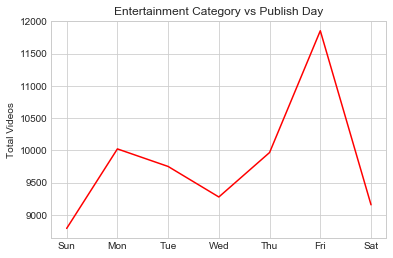

In [7]:
x=entertainment.index
plt.title("Entertainment Category vs Publish Day")
plt.ylabel('Total Videos')
plt.plot(x, entertainment,color='red', label='Entertainment')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
# Save the Figure
plt.savefig("Entertainment_By_Day.png")

plt.show()

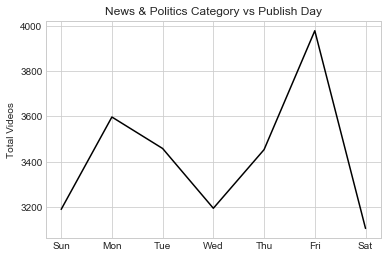

In [8]:
x=news_politics.index
plt.title("News & Politics Category vs Publish Day")
plt.ylabel('Total Videos')
plt.plot(x, news_politics,color='black', label='News & Politics')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Save the Figure
plt.savefig("News_Politics_By_Day.png")

plt.show()

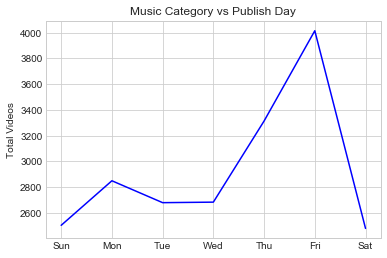

In [9]:
x=music.index
plt.title("Music Category vs Publish Day")
plt.ylabel('Total Videos')
plt.plot(x, music,color='blue', label='Music')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Save the Figure
plt.savefig("Music_By_Day.png")

plt.show()

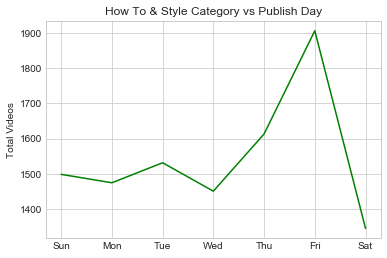

In [10]:
x=how_style.index
plt.title("How To & Style Category vs Publish Day")
plt.ylabel('Total Videos')
plt.plot(x, how_style, color='green', label='How To & Style')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Save the Figure
plt.savefig("HowTo_Style_By_Day.png")

plt.show()

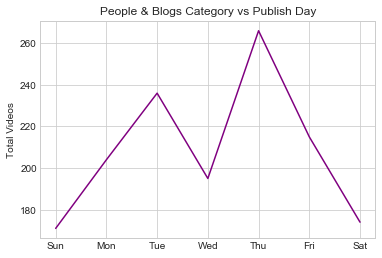

In [11]:
x=people_blogs.index
plt.title("People & Blogs Category vs Publish Day")
plt.ylabel('Total Videos')
plt.plot(x, people_blogs,color='purple', label='People & Blogs')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Save the Figure
plt.savefig("People_Blogs_By_Day.png")

plt.show()

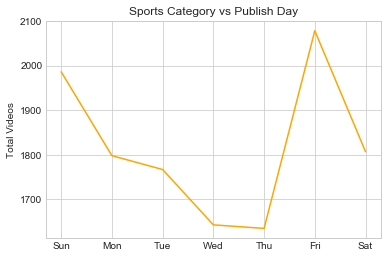

In [12]:
x=sports.index
plt.title("Sports Category vs Publish Day")
plt.ylabel('Total Videos')
plt.plot(x, sports, color='orange', label='Sports')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Save the Figure
plt.savefig("Sports_By_Day.png")

plt.show()

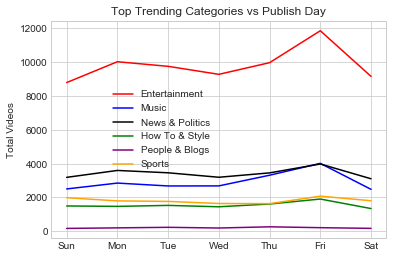

In [13]:
x=entertainment.index
plt.title("Top Trending Categories vs Publish Day")
plt.ylabel('Total Videos')
plt.plot(x, entertainment,color='red', label='Entertainment')
plt.plot(x, music,color='blue', label='Music')
plt.plot(x, news_politics,color='black', label='News & Politics')
plt.plot(x, how_style,color='green', label='How To & Style')
plt.plot(x, people_blogs,color='purple', label='People & Blogs')
plt.plot(x, sports, color='orange', label='Sports')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.legend(loc='center right', bbox_to_anchor=(.5, 0.5))

# Save the Figure
plt.savefig("All_Top_By_Day.png")

plt.show()

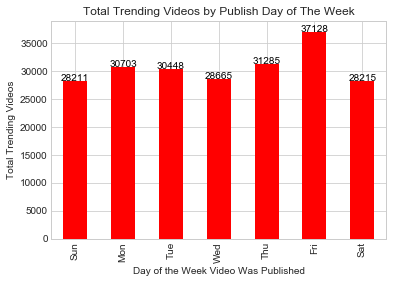

<Figure size 432x288 with 0 Axes>

In [14]:
#Chart out the days of the week the Total Trending Videos are Published On
by_day = result.groupby(['Publish Day'])
day_totals = by_day.Country.count()


by_day_chart = day_totals.plot(kind='bar', title="Total Trending Videos by Publish Day of The Week", color='r')
by_day_chart.set_xlabel('Day of the Week Video Was Published')
by_day_chart.set_ylabel('Total Trending Videos')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

#bar labels
count = 0
for value in day_totals:
    y_coor = value
    plt.text(count, y_coor, str(value), ha = 'center', color = 'black')
    count += 1

# Save the Figure
plt.savefig("Total_By_Day.png")

plt.show()
plt.tight_layout()

In [15]:
ca_by_day = reduced_ca_data.groupby(['Publish Day'])
us_by_day = reduced_us_data.groupby(['Publish Day'])
mx_by_day = reduced_mx_data.groupby(['Publish Day'])
jp_by_day = reduced_jp_data.groupby(['Publish Day'])
in_by_day = reduced_in_data.groupby(['Publish Day'])
kr_by_day = reduced_kr_data.groupby(['Publish Day'])

ca_day_totals = ca_by_day.Country.count()
us_day_totals = us_by_day.Country.count()
mx_day_totals = mx_by_day.Country.count()
jp_day_totals = jp_by_day.Country.count()
in_day_totals = in_by_day.Country.count()
kr_day_totals = kr_by_day.Country.count()


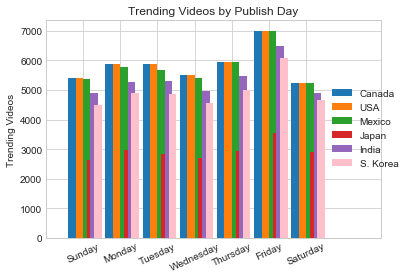

In [23]:
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
x = np.arange(len(labels)) # the x locations for the groups
width = 0.2 # the width of the bars

fig, ax = plt.subplots()
p1 = ax.bar(x -.3 , ca_day_totals, width, label='Canada')
p2 = ax.bar(x -.1, us_day_totals, width, label='USA')
p3 = ax.bar(x + .1, mx_day_totals, width, label='Mexico')
p4 = ax.bar(x + .2, jp_day_totals, width, label='Japan')
p5 = ax.bar(x + .3, in_day_totals, width, label='India')
p6 = ax.bar(x + .4, kr_day_totals, width, label='S. Korea', color='pink')

ax.set_ylabel('Trending Videos')
ax.set_title('Trending Videos by Publish Day')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25)
ax.set_xlim(-1, 8)

#ax.legend(loc='lower right')
ax.legend(loc='right', bbox_to_anchor=(1.08, 0.5))

# Save the Figure
plt.savefig("Country_By_Day.png")

plt.show()


In [17]:
#datasets only cover 2017 and 2018, and only over 8 months 
years = result['Publish Year'].value_counts() 
months=result['Publish Month'].sort_values().value_counts()


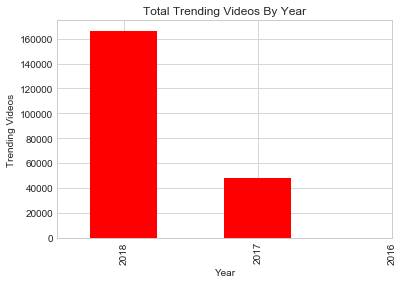

<Figure size 432x288 with 0 Axes>

In [18]:
yr_chart = years.plot(kind='bar', title="Total Trending Videos By Year", color='r')
yr_chart.set_xlabel('Year')
yr_chart.set_ylabel('Trending Videos')
yr_chart.set_xlim(-.5, 2)

# Save the Figure
plt.savefig("Total_By_Year.png")

plt.show()
plt.tight_layout()

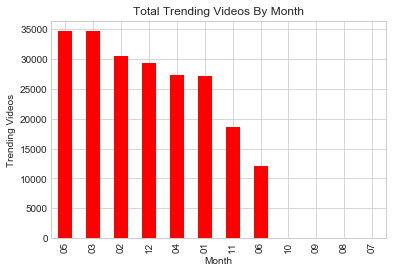

<Figure size 432x288 with 0 Axes>

In [19]:
month_chart = months.plot(kind='bar', title="Total Trending Videos By Month", color='r')
month_chart.set_xlabel('Month')
month_chart.set_ylabel('Trending Videos')

# Save the Figure
plt.savefig("Total_By_Month.png")

plt.show()
plt.tight_layout()